In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import time

In [2]:
df=pd.read_csv("F:\Work\diease detection\ckd\diease detection\Bangladesh -anam medical college.csv")

In [3]:
df=df.replace('?',np.nan)

In [4]:
data=df[['sg','bgr','sc','hemo','pcv','rbcc','rbc','htn',
         'dm','Label']].copy()

In [5]:
#df1=df.drop(columns=['id','age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc'])

In [6]:
df1=data.drop(columns=['rbc','htn','dm','Label'])

In [7]:
df1

,sg,bgr,sc,hemo,pcv,rbcc
0,1.02,110,3.6,11.95,35.45,4.755
1,1.01,133,3.6,11.95,35.45,4.755
2,1.01,110,3.6,9.35,31.55,4.755
3,1.01,133,3.6,14.55,43.25,4.755
4,1.016,175,3.6,14.55,39.35,5.345
...,...,...,...,...,...,...
195,1.02,175,3.6,9.35,31.55,4.755
196,1.02,133,3.6,8.05,23.75,4.755
197,NaN,110,3.6,15.85,39.35,6.525
198,NaN,133,3.6,14.55,47.15,4.755


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
lr=LinearRegression()
imp=IterativeImputer(estimator=lr,verbose=2,max_iter=100, tol=1e-10, imputation_order='roman')

In [10]:
df2=imp.fit_transform(df1)

[IterativeImputer] Completing matrix with shape (200, 6)
[IterativeImputer] Ending imputation round 1/100, elapsed time 0.02
[IterativeImputer] Change: 17.157029390169924, scaled tolerance: 4.27e-08 
[IterativeImputer] Ending imputation round 2/100, elapsed time 0.03
[IterativeImputer] Change: 2.7050332230416085, scaled tolerance: 4.27e-08 
[IterativeImputer] Ending imputation round 3/100, elapsed time 0.03
[IterativeImputer] Change: 1.4368839817627157, scaled tolerance: 4.27e-08 
[IterativeImputer] Ending imputation round 4/100, elapsed time 0.03
[IterativeImputer] Change: 0.7580854705238094, scaled tolerance: 4.27e-08 
[IterativeImputer] Ending imputation round 5/100, elapsed time 0.05
[IterativeImputer] Change: 0.40000743861903754, scaled tolerance: 4.27e-08 
[IterativeImputer] Ending imputation round 6/100, elapsed time 0.05
[IterativeImputer] Change: 0.2111204045387718, scaled tolerance: 4.27e-08 
[IterativeImputer] Ending imputation round 7/100, elapsed time 0.05
[IterativeImpute

In [11]:
dl1=pd.DataFrame(df2,columns=('sg','bgr','sc','hemo','pcv','rbcc'))

In [12]:
dl1.head(20)

,sg,bgr,sc,hemo,pcv,rbcc
0,1.020000,110.0,3.600,11.950000,35.450000,4.755
1,1.010000,133.0,3.600,11.950000,35.450000,4.755
2,1.010000,110.0,3.600,9.350000,31.550000,4.755
3,1.010000,133.0,3.600,14.550000,43.250000,4.755
4,1.016000,175.0,3.600,14.550000,39.350000,5.345
5,1.023000,110.0,3.600,13.414756,41.860158,5.345
6,1.020000,110.0,3.600,10.650000,31.550000,3.575
7,1.020000,133.0,3.600,11.950000,39.350000,4.755
8,1.017351,133.0,3.600,14.550000,39.350000,5.345
9,1.010000,110.0,3.600,8.050000,23.750000,4.165


In [13]:
df3=data.drop(columns=['sg','bgr','sc','hemo','pcv','rbcc','Label'])

In [14]:
df3

,rbc,htn,dm
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,0,1
...,...,...,...
195,0,1,1
196,0,0,1
197,0,0,0
198,0,0,0


In [15]:
x=pd.concat([dl1,df3],axis=1)

In [16]:
x

,sg,bgr,sc,hemo,pcv,rbcc,rbc,htn,dm
0,1.020000,110.0,3.6,11.95,35.45,4.755,0,0,0
1,1.010000,133.0,3.6,11.95,35.45,4.755,0,0,0
2,1.010000,110.0,3.6,9.35,31.55,4.755,1,0,0
3,1.010000,133.0,3.6,14.55,43.25,4.755,0,0,0
4,1.016000,175.0,3.6,14.55,39.35,5.345,0,0,1
...,...,...,...,...,...,...,...,...,...
195,1.020000,175.0,3.6,9.35,31.55,4.755,0,1,1
196,1.020000,133.0,3.6,8.05,23.75,4.755,0,0,1
197,1.019508,110.0,3.6,15.85,39.35,6.525,0,0,0
198,1.017229,133.0,3.6,14.55,47.15,4.755,0,0,0


In [17]:
y=df['Label']

In [18]:
a=pd.concat([x,y],axis=1)

In [19]:
a

,sg,bgr,sc,hemo,pcv,rbcc,rbc,htn,dm,Label
0,1.020000,110.0,3.6,11.95,35.45,4.755,0,0,0,ckd
1,1.010000,133.0,3.6,11.95,35.45,4.755,0,0,0,ckd
2,1.010000,110.0,3.6,9.35,31.55,4.755,1,0,0,ckd
3,1.010000,133.0,3.6,14.55,43.25,4.755,0,0,0,ckd
4,1.016000,175.0,3.6,14.55,39.35,5.345,0,0,1,ckd
...,...,...,...,...,...,...,...,...,...,...
195,1.020000,175.0,3.6,9.35,31.55,4.755,0,1,1,ckd
196,1.020000,133.0,3.6,8.05,23.75,4.755,0,0,1,ckd
197,1.019508,110.0,3.6,15.85,39.35,6.525,0,0,0,notckd
198,1.017229,133.0,3.6,14.55,47.15,4.755,0,0,0,notckd


In [20]:
#a=a.sort_values(['bu'],ascending=False)
#a.reset_index(drop=True,inplace=True)

In [21]:
#a.tail(40)

In [22]:
Label={'notckd':0,'ckd':1}
a['Label']=a['Label'].map(Label)

In [23]:
a.head(20)

,sg,bgr,sc,hemo,pcv,rbcc,rbc,htn,dm,Label
0,1.020000,110.0,3.600,11.950000,35.450000,4.755,0,0,0,1
1,1.010000,133.0,3.600,11.950000,35.450000,4.755,0,0,0,1
2,1.010000,110.0,3.600,9.350000,31.550000,4.755,1,0,0,1
3,1.010000,133.0,3.600,14.550000,43.250000,4.755,0,0,0,1
4,1.016000,175.0,3.600,14.550000,39.350000,5.345,0,0,1,1
5,1.023000,110.0,3.600,13.414756,41.860158,5.345,0,0,0,0
6,1.020000,110.0,3.600,10.650000,31.550000,3.575,0,1,1,1
7,1.020000,133.0,3.600,11.950000,39.350000,4.755,0,0,0,1
8,1.017351,133.0,3.600,14.550000,39.350000,5.345,0,0,0,0
9,1.010000,110.0,3.600,8.050000,23.750000,4.165,0,0,0,1


In [24]:
u=a.iloc[:,:-1]
v=a['Label']

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE 

In [26]:
smote=SMOTE()
sm = SVMSMOTE()

In [27]:
x_train_resample,y_train_resample=sm.fit_resample(u,v) 

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
k=scaler.fit_transform(x_train_resample)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(k,y_train_resample,test_size=0.2, random_state=0)

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
fold=ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
fold1=KFold(5)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [31]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

In [84]:
svm=SVC(C=10,kernel='rbf',gamma=0.1,probability=True)
knn=KNeighborsClassifier(n_neighbors=3)
rf=RandomForestClassifier(n_estimators=80,max_features='auto',bootstrap=True,
                          min_samples_split=7,min_samples_leaf=5,max_depth=None,random_state=0)
qda = QuadraticDiscriminantAnalysis()
tree=DecisionTreeClassifier(criterion='gini',min_samples_split=3,random_state=0,max_depth=None)
tree1=DecisionTreeClassifier(criterion='gini',min_samples_split=3,random_state=0,max_depth=8)
estimators1=[('svc',svm),('knn',knn)]
sc=StackingClassifier(estimators=estimators1,final_estimator=rf)
estimators=[('svc',svm),('rf',rf),('knn',knn)]

voting=VotingClassifier(estimators=estimators,voting='soft')
bag=BaggingClassifier(
    base_estimator=tree,
    n_estimators=500,
    bootstrap=True,
    bootstrap_features=False,
    n_jobs=-1,
    random_state=0
    )
ada= AdaBoostClassifier(
      base_estimator=tree1,n_estimators=500,algorithm='SAMME', 
      random_state=0
      )
gdb=GradientBoostingClassifier(n_estimators=100,max_depth=4,learning_rate=0.1,min_samples_leaf=10)
lgb=LGBMClassifier(n_estimators=100,max_depth=8,learning_rate=0.1,min_child_weight=1)
xgb=XGBClassifier(n_estimators=700,max_depth=8,learning_rate=0.20,min_child_weight=2)

In [75]:
labels=['svm','knn','tree','rf','qda','voting','bag','ada','gdb','xgb','lgb','sc']

In [76]:
for clf,label in zip([svm,knn,tree,rf,qda,voting,bag,ada,gdb,xgb,lgb,sc],labels):
    training_start = time.perf_counter()
    results_svm=cross_val_score(clf,x_train,y_train,cv=fold,scoring='accuracy')
    training_end = time.perf_counter()
    train_time = training_end-training_start
    print("Time consumed for training: %4.3f seconds" % (train_time))
    print("%0.4faccuracy with a standard deviation of %0.4f" % (results_svm.mean(), results_svm.std()),label)

Time consumed for training: 0.022 seconds
1.0000accuracy with a standard deviation of 0.0000 svm
Time consumed for training: 0.019 seconds
1.0000accuracy with a standard deviation of 0.0000 knn
Time consumed for training: 0.010 seconds
0.9810accuracy with a standard deviation of 0.0381 tree
Time consumed for training: 0.659 seconds
0.9714accuracy with a standard deviation of 0.0233 rf
Time consumed for training: 0.011 seconds
0.4190accuracy with a standard deviation of 0.1457 qda


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Time consumed for training: 0.659 seconds
1.0000accuracy with a standard deviation of 0.0000 voting
Time consumed for training: 1.962 seconds
0.9810accuracy with a standard deviation of 0.0233 bag
Time consumed for training: 3.170 seconds
0.9714accuracy with a standard deviation of 0.0233 ada
Time consumed for training: 0.319 seconds
0.9810accuracy with a standard deviation of 0.0233 gdb
[23:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old

C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: Use

[23:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time consumed for training: 0.610 seconds
0.9714accuracy with a standard deviation of 0.0233 xgb
Time consumed for training: 0.050 seconds
0.9714accuracy with a standard deviation of 0.0233 lgb
Time consumed for training: 0.687 seconds
0.9905accuracy with a standard deviation of 0.0190 sc


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score 

In [36]:
for clf,label in zip([svm,knn,tree,rf,qda,voting,bag,ada,gdb,xgb,lgb,sc],labels):
    training_start = time.perf_counter()
    clf.fit(x_train,y_train)
    training_end = time.perf_counter()
    train_time = training_end-training_start
    print("Time consumed for training: %4.3f seconds" % (train_time))
    y_pred=clf.predict(x_test)
    print(accuracy_score(y_test,y_pred),label)
    print(confusion_matrix(y_test,y_pred))
    print(precision_score(y_test,y_pred))
    print(recall_score(y_test,y_pred))
    print(f1_score(y_test,y_pred))
    print(roc_auc_score(y_test,y_pred))

Time consumed for training: 0.003 seconds
1.0 svm
[[22  0]
 [ 0 30]]
1.0
1.0
1.0
1.0
Time consumed for training: 0.001 seconds
1.0 knn
[[22  0]
 [ 0 30]]
1.0
1.0
1.0
1.0
Time consumed for training: 0.001 seconds
0.9807692307692307 tree
[[22  0]
 [ 1 29]]
1.0
0.9666666666666667
0.983050847457627
0.9833333333333334
Time consumed for training: 0.104 seconds
0.9615384615384616 rf
[[20  2]
 [ 0 30]]
0.9375
1.0
0.967741935483871
0.9545454545454545
Time consumed for training: 0.001 seconds
0.5769230769230769 qda
[[ 0 22]
 [ 0 30]]
0.5769230769230769
1.0
0.7317073170731707
0.5


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Time consumed for training: 0.151 seconds
1.0 voting
[[22  0]
 [ 0 30]]
1.0
1.0
1.0
1.0
Time consumed for training: 0.314 seconds
0.9807692307692307 bag
[[21  1]
 [ 0 30]]
0.967741935483871
1.0
0.9836065573770492
0.9772727272727273
Time consumed for training: 0.586 seconds
1.0 ada
[[22  0]
 [ 0 30]]
1.0
1.0
1.0
1.0
Time consumed for training: 0.065 seconds
0.9807692307692307 gdb
[[21  1]
 [ 0 30]]
0.967741935483871
1.0
0.9836065573770492
0.9772727272727273
[23:14:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MD SABBIR SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Time consumed for training: 0.142 seconds
0.9615384615384616 xgb
[[20  2]
 [ 0 30]]
0.9375
1.0
0.967741935483871
0.9545454545454545
Time consumed for training: 0.012 seconds
0.9807692307692307 lgb
[[21  1]
 [ 0 30]]
0.967741935483871
1.0
0.9836065573770492
0.9772727272727273
Time consumed for training: 0.027 seconds
1.0 sc
[[22  0]
 [ 0 30]]
1.0
1.0
1.0
1.0


In [37]:
from mlxtend.evaluate import combined_ftest_5x2cv

In [38]:
f, p = combined_ftest_5x2cv(estimator1=svm,
                            estimator2=knn,
                            X=k, y=y_train_resample,
                            random_seed=1)

In [39]:
print('F statistic: %.3f' % f)
print('p value: %.3f' % p)

F statistic: 1.833
p value: 0.261


# Random Forest

[learning_curve] Training set sizes: [  2   6  11  16  20  25  30  34  39  44  48  53  58  62  67  72  76  81
  85  90  95  99 104 109 113 118 123 127 132 137 141 146 151 155 160 164
 169 174 178 183 188 192 197 202 206 211 216 220 225 230]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    9.8s finished


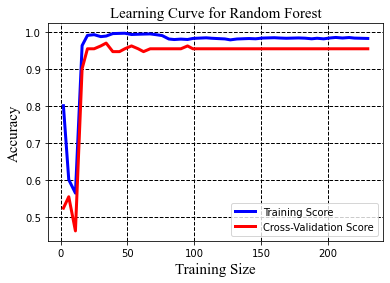

In [70]:
train_sizes,train_scores,test_scores=learning_curve(rf, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning Curve for Random Forest', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.savefig("random.jpg",dpi=300)
plt.show()

# Voting

[learning_curve] Training set sizes: [  2   6  11  16  20  25  30  34  39  44  48  53  58  62  67  72  76  81
  85  90  95  99 104 109 113 118 123 127 132 137 141 146 151 155 160 164
 169 174 178 183 188 192 197 202 206 211 216 220 225 230]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    9.3s finished


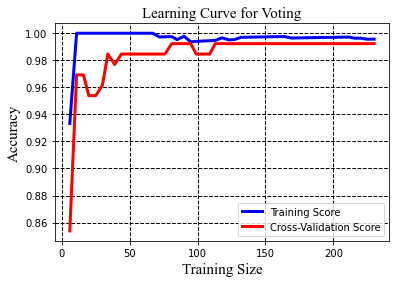

In [79]:
train_sizes,train_scores,test_scores=learning_curve(voting, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning Curve for Voting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.savefig("voting.jpg",dpi=300)
plt.show()

# Bagging

[learning_curve] Training set sizes: [  2   6  11  16  20  25  30  34  39  44  48  53  58  62  67  72  76  81
  85  90  95  99 104 109 113 118 123 127 132 137 141 146 151 155 160 164
 169 174 178 183 188 192 197 202 206 211 216 220 225 230]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.0min finished


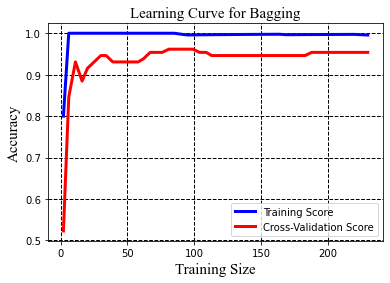

In [42]:
train_sizes,train_scores,test_scores=learning_curve(bag, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning Curve for Bagging', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.savefig('bagging.jpg',dpi=300)
plt.show()

# Adaptive

[learning_curve] Training set sizes: [  2   6  11  16  20  25  30  34  39  44  48  53  58  62  67  72  76  81
  85  90  95  99 104 109 113 118 123 127 132 137 141 146 151 155 160 164
 169 174 178 183 188 192 197 202 206 211 216 220 225 230]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   12.2s finished


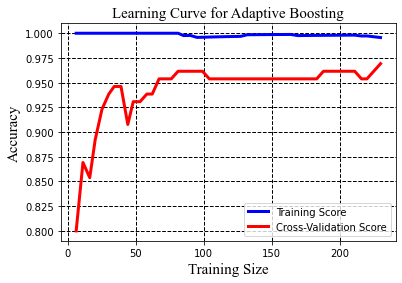

In [85]:
train_sizes,train_scores,test_scores=learning_curve(ada, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning Curve for Adaptive Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout
plt.savefig('adaptive.jpg',dpi=300)
plt.show()

# Gradient

[learning_curve] Training set sizes: [  2   6  11  16  20  25  30  34  39  44  48  53  58  62  67  72  76  81
  85  90  95  99 104 109 113 118 123 127 132 137 141 146 151 155 160 164
 169 174 178 183 188 192 197 202 206 211 216 220 225 230]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    5.1s finished


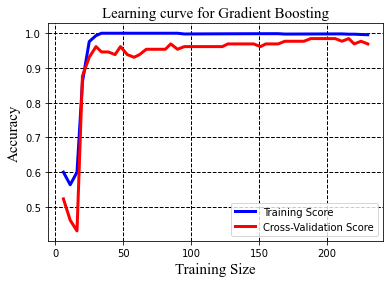

In [44]:
train_sizes,train_scores,test_scores=learning_curve(gdb, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning curve for Gradient Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout

plt.savefig('gradient.jpg',dpi=300)
plt.show()

# LGB

[learning_curve] Training set sizes: [  2   6  11  16  20  25  30  34  39  44  48  53  58  62  67  72  76  81
  85  90  95  99 104 109 113 118 123 127 132 137 141 146 151 155 160 164
 169 174 178 183 188 192 197 202 206 211 216 220 225 230]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    2.3s finished


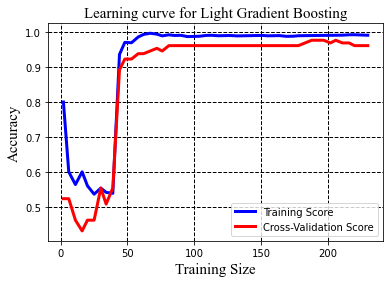

In [45]:
train_sizes,train_scores,test_scores=learning_curve(lgb, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning curve for Light Gradient Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout

plt.savefig('Light.jpg',dpi=300)
plt.show()

# Xtreme

[learning_curve] Training set sizes: [  2   6  11  16  20  25  30  34  39  44  48  53  58  62  67  72  76  81
  85  90  95  99 104 109 113 118 123 127 132 137 141 146 151 155 160 164
 169 174 178 183 188 192 197 202 206 211 216 220 225 230]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   16.2s finished


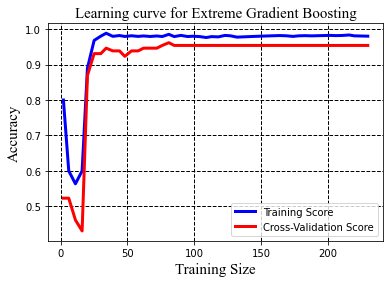

In [46]:
train_sizes,train_scores,test_scores=learning_curve(xgb, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning curve for Extreme Gradient Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout

plt.savefig('Xtreme.jpg',dpi=300)
plt.show()

# Stacking

[learning_curve] Training set sizes: [  2   6  11  16  20  25  30  34  39  44  48  53  58  62  67  72  76  81
  85  90  95  99 104 109 113 118 123 127 132 137 141 146 151 155 160 164
 169 174 178 183 188 192 197 202 206 211 216 220 225 230]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   15.1s finished


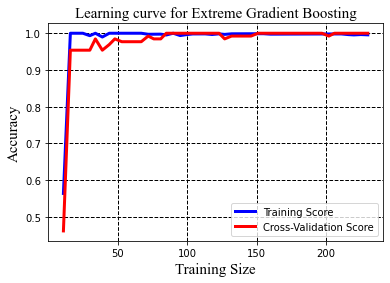

In [51]:
train_sizes,train_scores,test_scores=learning_curve(sc, k, y_train_resample, cv=fold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes, train_mean, label ='Training Score', lw='3', c='b')
plt.plot(train_sizes, test_mean, label ='Cross-Validation Score', lw='3', c='r')
f1={'family':'Times New Roman','color':'black','size':15}
f2={'family':'Times New Roman','color':'black','size':15}
plt.title('Learning curve for Extreme Gradient Boosting', fontdict=f1)
plt.xlabel('Training Size', fontdict=f2)
plt.ylabel('Accuracy', fontdict=f2)
plt.legend(loc='best')
plt.grid(axis='both', ls='dashed', lw=1, c='black')
plt.tight_layout
plt.savefig('Stacking.jpg',dpi=300)
plt.show()